# Análise exploratória de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\layss\OneDrive\Cursos\Avanti_Bootecamp\avanti-bootecamp-cdd\data\raw\data.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1. Descrição dos dados

In [4]:
print(f"Quantidade de instâncias: {df.shape[0]}")
print(f"Quantidade de variáveis: {df.shape[1]}")

Quantidade de instâncias: 53940
Quantidade de variáveis: 11


In [5]:
print("Tipos de Variáveis:")
print(df.dtypes)

Tipos de Variáveis:
Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object


In [6]:
print("Quantidade de valores faltantes:")
print(df.isnull().sum())

Quantidade de valores faltantes:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [7]:
print({df.info()})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
{None}


In [8]:
print("Resumo estatístico:")
print(df.describe(include="all"))

Resumo estatístico:
          Unnamed: 0         carat    cut  color clarity         depth  \
count   53940.000000  53940.000000  53940  53940   53940  53940.000000   
unique           NaN           NaN      5      7       8           NaN   
top              NaN           NaN  Ideal      G     SI1           NaN   
freq             NaN           NaN  21551  11292   13065           NaN   
mean    26969.500000      0.797940    NaN    NaN     NaN     61.749405   
std     15571.281097      0.474011    NaN    NaN     NaN      1.432621   
min         0.000000      0.200000    NaN    NaN     NaN     43.000000   
25%     13484.750000      0.400000    NaN    NaN     NaN     61.000000   
50%     26969.500000      0.700000    NaN    NaN     NaN     61.800000   
75%     40454.250000      1.040000    NaN    NaN     NaN     62.500000   
max     53939.000000      5.010000    NaN    NaN     NaN     79.000000   

               table         price             x             y             z  
count   5394

## 2. Perguntas de partida e hipóteses

1. Como o peso (cart) dos diamantes se relaciona com o preço?
Hipótese: Quanto mais pesado, os diamantes tendem a ser mais caro.

In [9]:
print(df[["carat", "price"]].corr())

          carat     price
carat  1.000000  0.921591
price  0.921591  1.000000


2. Existe correlação entre a qualidade do corte (cut) e o preço (price)?
Hipótese: Diamantes com cortes de qualidade superior (Ideal) tendem a ser mais caro.

In [10]:
mean_prices = df.groupby("cut")["price"].mean().sort_values()
print(mean_prices)

cut
Ideal        3457.541970
Good         3928.864452
Very Good    3981.759891
Fair         4358.757764
Premium      4584.257704
Name: price, dtype: float64


3. Como a clareza (clarity) e a cor (color) afetam o preço dos diamantes?
Hipótese: Diamantes com melhor clareza (IF) e cor mais pura (D) tendem a ser mais caro.

In [11]:
print(df.groupby("clarity")["price"].mean().sort_values())

clarity
VVS1    2523.114637
IF      2864.839106
VVS2    3283.737071
VS1     3839.455391
I1      3924.168691
VS2     3924.989395
SI1     3996.001148
SI2     5063.028606
Name: price, dtype: float64


In [12]:
print(df.groupby("color")["price"].mean().sort_values())

color
E    3076.752475
D    3169.954096
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64


4. Qual a distribuição dos preços? Podemos identificar valores atípicos ou padrões específicos?

In [13]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]
print(f"Número de valores atípicos: {outliers.shape[0]}")
print("Valores atípicos:\n", outliers[['price']])

Número de valores atípicos: 3540
Valores atípicos:
        price
23820  11886
23821  11886
23822  11888
23823  11888
23824  11888
...      ...
27745  18803
27746  18804
27747  18806
27748  18818
27749  18823

[3540 rows x 1 columns]


## 3. Insights

1. A análise mostra uma correlação positiva entre o peso (carat) e o preço (price) dos diamantes, indicando que diamantes mais pesados são mais caros.

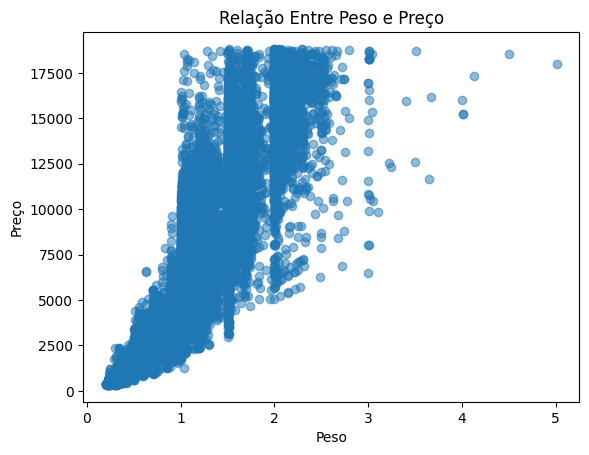

In [14]:
plt.scatter(df["carat"], df["price"], alpha=0.5)
plt.title("Relação Entre Peso e Preço")
plt.xlabel("Peso")
plt.ylabel("Preço")
plt.show()

2. A qualidade do corte parece influenciar o preço, com cortes de qualidade 'Premium' tendo preços médios mais elevados.

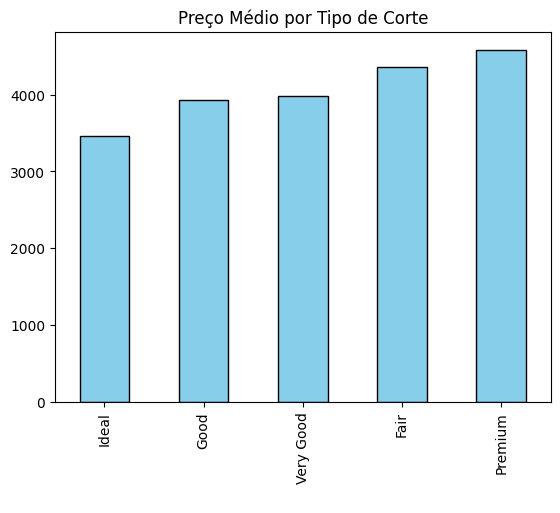

In [15]:
mean_prices.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Preço Médio por Tipo de Corte")
plt.xlabel(" ")
plt.show()

3. A clareza ou cor não são características que afetam significativamente o preço Diamantes.

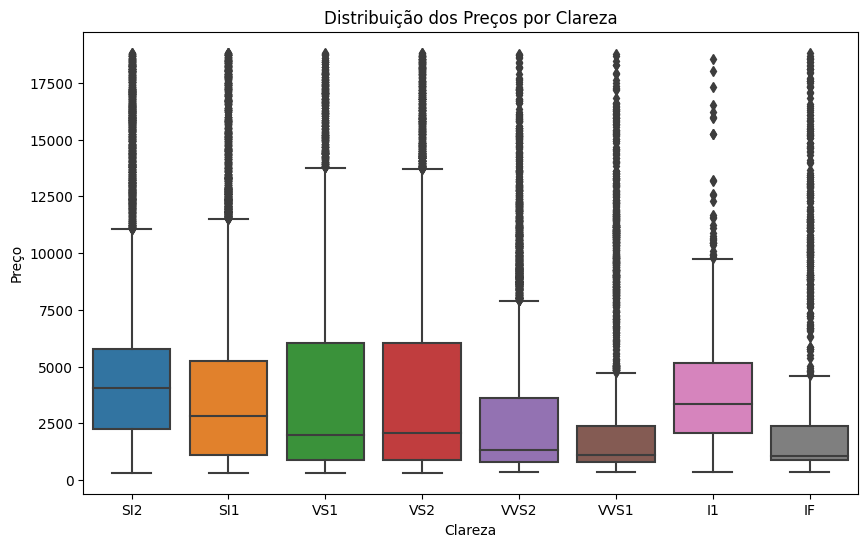

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='clarity', y='price', data=df)
plt.title('Distribuição dos Preços por Clareza')
plt.xlabel('Clareza')
plt.ylabel('Preço')
plt.show()

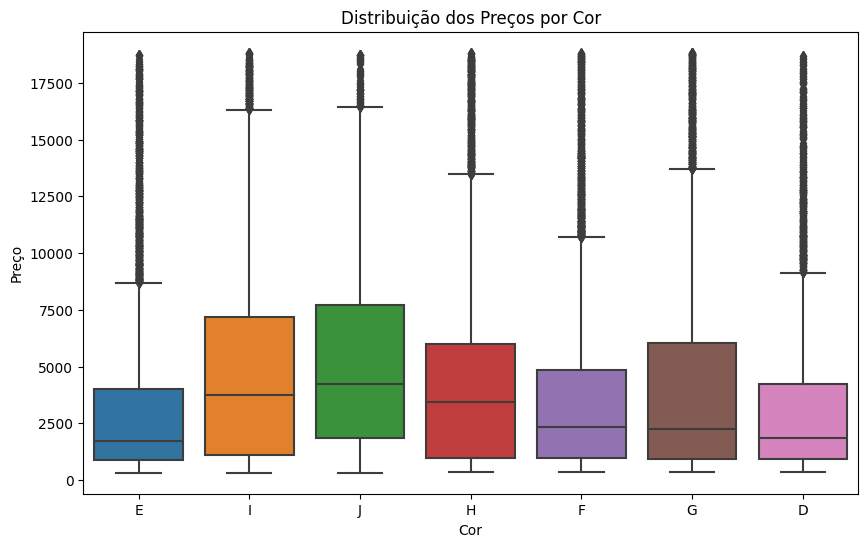

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='color', y='price', data=df)
plt.title('Distribuição dos Preços por Cor')
plt.xlabel('Cor')
plt.ylabel('Preço')
plt.show()

4. A distribuição dos preços revela a presença de valores altos fora da curva, que podem ser considerados valores atípicos. Causado pelas diversas características que fazem o preço variar.

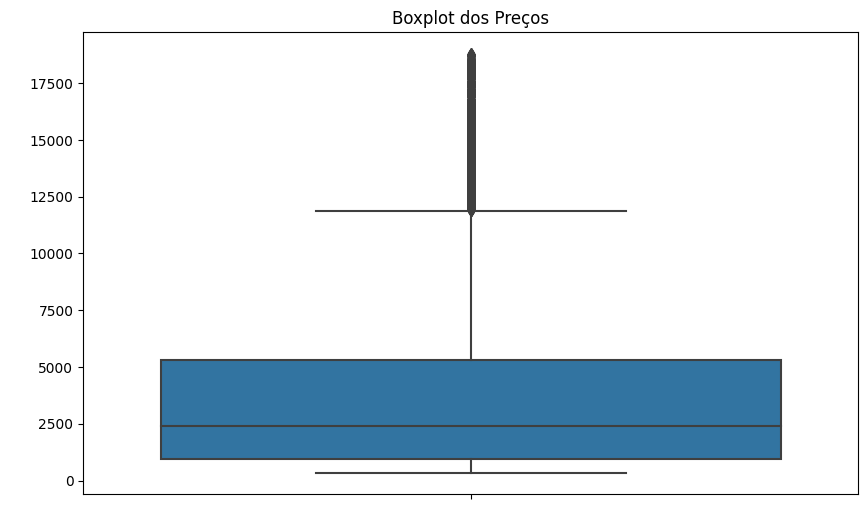

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'])
plt.title('Boxplot dos Preços')
plt.ylabel(' ')
plt.show()

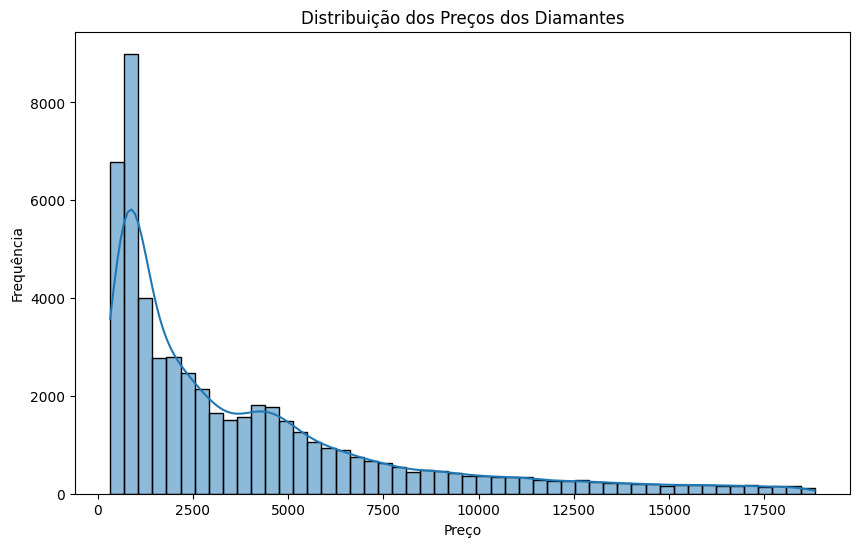

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribuição dos Preços dos Diamantes")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()

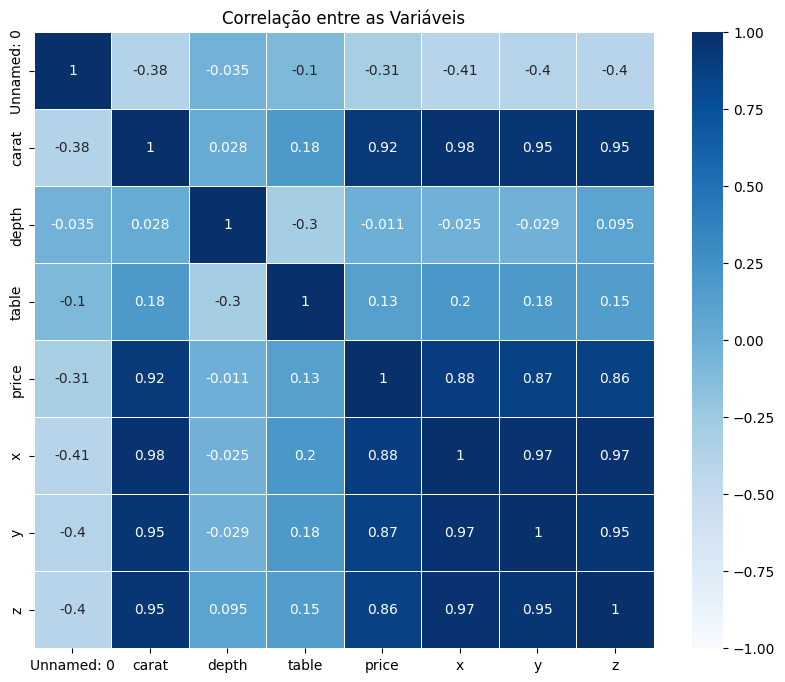

In [20]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlação entre as Variáveis')
plt.show()
